<a href="https://colab.research.google.com/github/lisabroadhead/data_science_machine-learning/blob/main/KNN_Challenge_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Challenge (Practice)
- Lisa Broadhead
- July 5, 2023

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
file = '/content/drive/MyDrive/Colab Notebooks/coding_dojo/Machine Learning/files/abalone.data'

df = pd.read_csv(file)
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
df.columns = ["Sex", "Length", "Diameter", "Height", 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [17]:
X = df.drop(columns='Sex')
y = df['Sex']
X.shape

(4176, 8)

In [18]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### 1. Is this a balanced data set?

In [19]:
df['Sex'].value_counts()

M    1527
I    1342
F    1307
Name: Sex, dtype: int64

In [20]:
df['Sex'].value_counts(normalize=True)

M    0.365661
I    0.321360
F    0.312979
Name: Sex, dtype: float64

### 3. Be sure to scale your data (try using the pipeline!)

In [21]:
scaler = StandardScaler()

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn_pipe = make_pipeline(scaler,knn)
knn_pipe.fit(X_train, y_train)

# predictions = knn_pipe.predict(X_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [27]:
predictions = knn_pipe.predict(X_test)
predictions

array(['F', 'M', 'I', ..., 'M', 'F', 'F'], dtype=object)

### 3. What is the accuracy of your default model?

In [29]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.5114942528735632

### 4. What is the optimal accuracy you can achieve by tuning the value of K using KNN?
 
- 1.0 or 100%



### 5. Create a confusion matrix for your optimal KNN model.

In [36]:
logreg_pipe = make_pipeline(StandardScaler(), LogisticRegression())

logreg_pipe.fit(X_train, y_train)

predictions = logreg_pipe.predict(X_test)
print('Predictions:')
predictions

Predictions:


array(['F', 'M', 'M', ..., 'F', 'F', 'I'], dtype=object)

In [37]:
print('True Values')
y_test.values

True Values


array(['F', 'F', 'I', ..., 'F', 'F', 'F'], dtype=object)

In [40]:
cm = confusion_matrix(y_test.values, predictions)
cm

array([[115,  55, 142],
       [ 22, 276,  35],
       [116,  87, 196]])

In [42]:
cm_df = pd.DataFrame(cm)
cm_df

,0,1,2
0,115,55,142
1,22,276,35
2,116,87,196


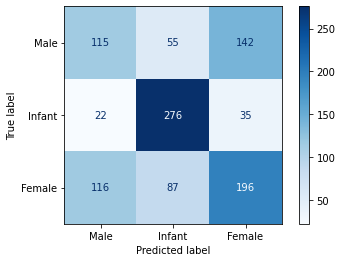

In [46]:
labels=['Male','Infant','Female']
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=labels, cmap='Blues');